In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Introduction:**

Bellabeat was founded in 2013, company has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. Bellabeat has 5 focus products: Their app, leaf, time, spring and bellabeat membership. This is a successful startup, that has grown into a small company, but they have the potential to become a larger in the global smart device market. I have been asked to analyze smart device market and smart device data to gain insight into how consumers are using their smart devices. The insights that I will discover help me guide marketing strategy for the company.

• Bellabeat Application: provides users with health data based on their sleep, activity, menstrual cycle, stress, and mindfulness habits

• Leaf: Bellabeat’s wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track sleep, activity, and stress.

• Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

• Bellabeat membership: subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

**Ask Phase**

**Business task:**

Analyze Fitbit data to gain insight and help guide marketing strategy for Bellabeat to grow as a global player. Smart devices are an essential part of today's life so company want to study data from other fitness devices to make their future marketing strategy for their products.

**Key stakeholders:**

Urška Sršen – Bellabeat’s co-founder and CPO

Sandro Mur – Mathematician and Bellabeat’s co-founder; key member of the Bellabeat executive team

Firstly, I decided to analyze smart device usage data to gain insight into how consumers use non-Bellabeat smart devices. Next task is to select one Bellabeat product to apply these insights to the presentation. These questions will guide my analysis:

What are some trends in smart device usage?
How could these trends apply to Bellabeat customers?
How could these trends help influence Bellabeat marketing strategy?

**Prepare and Process**

For this analysis, I will be focusing on the daily data as my analysis will be on detecting high-level trends in smart device usage. I will be using the “dailyActivity_merged”, and “sleepDay_merged” datasets as they will probably give some interesting insights into the user data.

In [1]:
library("tidyverse")
library("here")
library("skimr")
library("janitor")
library("dplyr")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [3]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
sleep_day_new <- sleep_day %>% 
  separate(SleepDay, c("Date", "Time"), " ")

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [5]:
n_distinct(daily_activity$Id)
n_distinct(sleep_day_new$Id) # how many distinct users there are in each dataframe.

nrow(daily_activity)
nrow(sleep_day_new) # how many observations there are in each dataframe

nrow(daily_activity[duplicated(daily_activity),])
nrow(sleep_day_new[duplicated(sleep_day_new),]) # duplicates check

[1] 33

[1] 24

[1] 940

[1] 413

[1] 0

[1] 3

In [6]:
sleep_day_new <- unique(sleep_day_new)
nrow(sleep_day_new) #eliminate duplicates

[1] 410

In [16]:
daily_activity <- daily_activity %>% filter(TotalSteps !=0)
daily_activity <- daily_activity %>%  filter(TotalDistance !=0) #eliminate 0 values

**Analyse**

In [17]:
daily_activity %>% 
  select(TotalSteps,
         TotalDistance,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         SedentaryMinutes,
         Calories) %>% 
  summary()

   TotalSteps    TotalDistance    VeryActiveMinutes FairlyActiveMinutes
 Min.   :    8   Min.   : 0.010   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 4927   1st Qu.: 3.373   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 8054   Median : 5.590   Median :  7.00    Median :  8.00     
 Mean   : 8329   Mean   : 5.986   Mean   : 23.04    Mean   : 14.79     
 3rd Qu.:11096   3rd Qu.: 7.905   3rd Qu.: 35.00    3rd Qu.: 21.00     
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes SedentaryMinutes    Calories   
 Min.   :  0.0        Min.   :   0.0   Min.   :  52  
 1st Qu.:147.0        1st Qu.: 721.2   1st Qu.:1857  
 Median :208.5        Median :1020.5   Median :2220  
 Mean   :210.3        Mean   : 955.2   Mean   :2362  
 3rd Qu.:272.0        3rd Qu.:1189.0   3rd Qu.:2832  
 Max.   :518.0        Max.   :1440.0   Max.   :4900  

Observations:

    Average sedentary minutes were at 955.2 minutes or 16 hours.
    Average very active minutes and fairly active minutes were at 23.04 minutes and 14.79 minutes respectively.
    Average lightly active minutes were at 210.3 minutes, or 3.5 hours.
    The average amount of calories burnt per day was around 2362kcal.
Deductions:

    Participants were largely inactive throughout the day.
    Participants spent a low amount of time exercising.
    Participants are unlikely to take part in vigorous activities.

In [19]:
sleep_day_new %>% 
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed) %>% 
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

Observations:

    Participants spent, on average, 458.6 minutes (7.64 hours) in bed.
    Average sleeping time was 419.5 minutes or 7 hours.
    Participants slept once per day on average.
    Deductions:

    Participants had an adequate amount of sleep.

**Share**: -
    
    The more active that you're, the more steps you take, and the more calories you will burn. This is an obvious fact, but we can still investigate the data to find any interesting. Here we see that some users who are sedentary, take minimal steps, but still able to burn over 1500 to 2500 calories compare to users who are more active, take more steps, but still burn similar calories.

`geom_smooth()` using formula 'y ~ x'



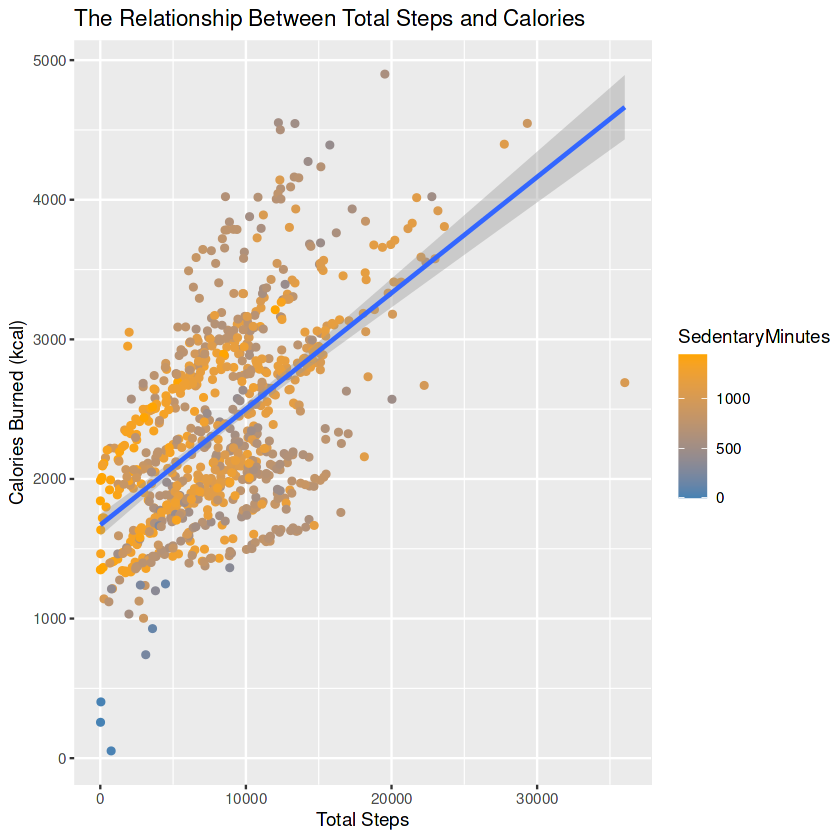

In [21]:
ggplot(data=daily_activity, aes(x=TotalSteps, y = Calories, color=SedentaryMinutes))+ 
  geom_point()+ 
  stat_smooth(method=lm)+
  scale_color_gradient(low="steelblue", high="orange")+
  labs(title="The Relationship Between Total Steps and Calories", x="Total Steps", y="Calories Burned (kcal)")

This graph shows a positive correlation between the total amount of steps and the calories burned - the larger the total amount of steps, the more calories burned. Also including sedentary minutes as a color for points.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



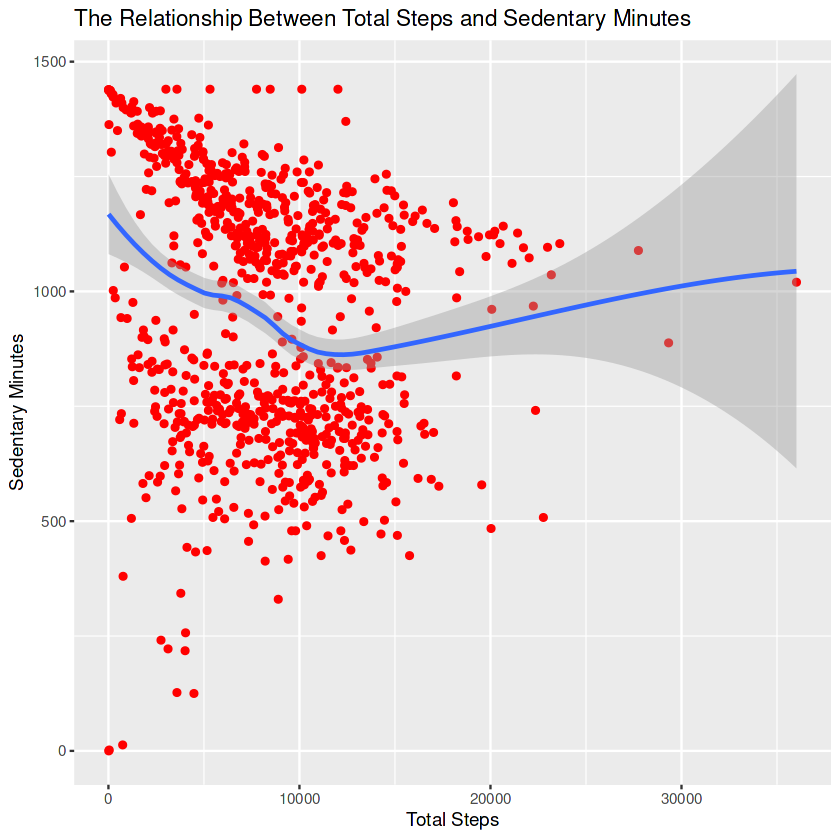

In [22]:
ggplot(data=daily_activity) +
  geom_point(mapping=aes(x=TotalSteps, y=SedentaryMinutes), color="red") +
  geom_smooth(mapping=aes(x=TotalSteps, y=SedentaryMinutes)) +
  labs(title="The Relationship Between Total Steps and Sedentary Minutes", x="Total Steps", y="Sedentary Minutes")

This graph shows a negative correlation between total steps and sedentary minutes - the lower the total steps, the higher the sedentary minutes.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



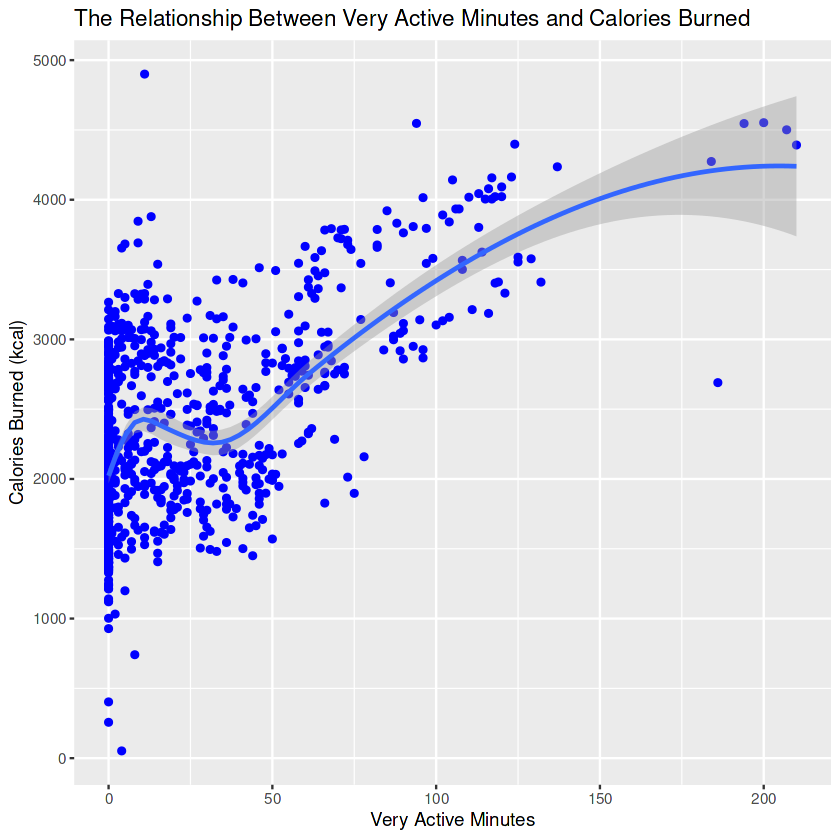

In [23]:
ggplot(data=daily_activity) +
  geom_point(mapping=aes(x=VeryActiveMinutes, y=Calories), color="blue") +
  geom_smooth(mapping=aes(x=VeryActiveMinutes, y=Calories)) +
  labs(title="The Relationship Between Very Active Minutes and Calories Burned", x="Very Active Minutes", y="Calories Burned (kcal)")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



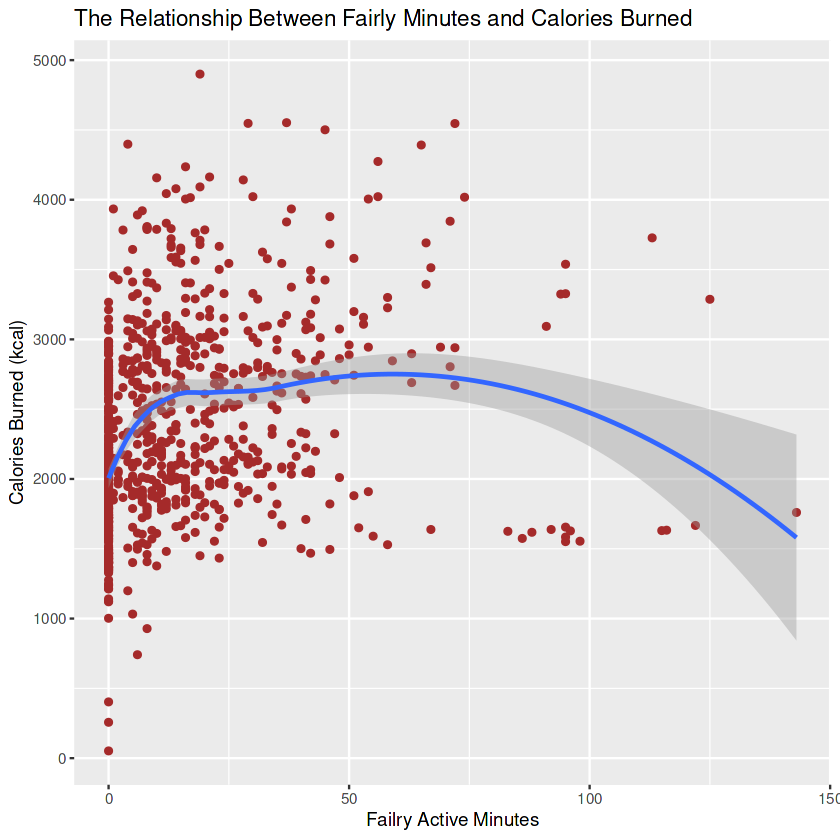

In [24]:
ggplot(data=daily_activity) +
  geom_point(mapping=aes(x=FairlyActiveMinutes, y=Calories), color="brown") +
  geom_smooth(mapping=aes(x=FairlyActiveMinutes, y=Calories)) +
  labs(title="The Relationship Between Fairly Minutes and Calories Burned", x="Failry Active Minutes", y="Calories Burned (kcal)")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



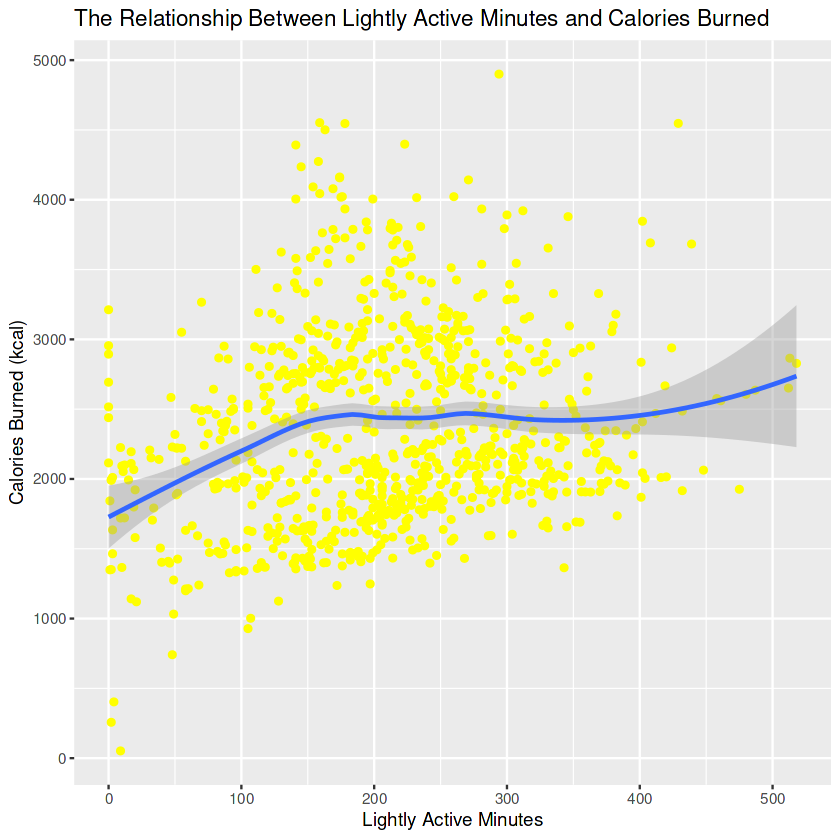

In [26]:
ggplot(data=daily_activity) +
  geom_point(mapping=aes(x=LightlyActiveMinutes, y=Calories), color="yellow") +
  geom_smooth(mapping=aes(x=LightlyActiveMinutes, y=Calories)) +
  labs(title="The Relationship Between Lightly Active Minutes and Calories Burned", x="Lightly Active Minutes", y="Calories Burned (kcal)")

From these graphs, we can clearly see that there are positive relationships between very active minutes, and lightly active minutes against the calories burned. However, there seems to be a negative relationship between fairly active minutes and the number of calories burned. We can also see that more calories were burned with people who did lighter activities compared to those who were very and/or fairly active.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



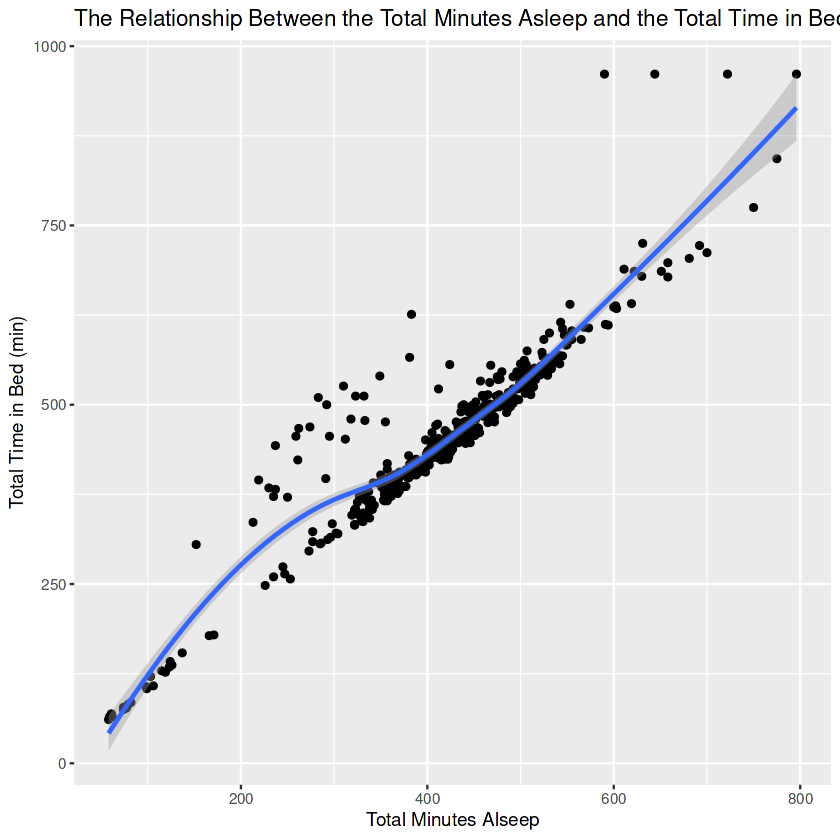

In [27]:
ggplot(data=sleep_day_new, mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
  geom_point() +
  geom_smooth() +
  labs(title="The Relationship Between the Total Minutes Asleep and the Total Time in Bed", x="Total Minutes Alseep", y="Total Time in Bed (min)")

As you can see from the graph above, there is a positive correlation between the total minutes asleep and the amount of time spent in bed. Using this data, Bellabeat can use an app that notifies its customers about when it would be the right time to go to bed so that they can get an adequate amount of sleep.

**Act**

Recommendations for Bellabeat Marketing Strategy:

Based on the activity levels and amount of calories burned, users appear to burn more calories with more exercise. Therefore, Bellabeat should encourage users to exercise more through reminders. They could also offer app incentives, such as give users app credits for every 1000 steps, which can then be used to redeem prizes or vouchers.

The data also shows many people lead either a lightly active or sedentary lifestyle, which may be due to the nature of their work or the lack of time to exercise. Bellabeat could have a section on their app for short workout videos or short exercises (for example, 10 minute videos) that their customers can follow along to if they don’t necessarily want to exercise alone.

To encourage better sleeping habits, Bellabeat could incorporate reminders through an app that notifies users of the best time to go to sleep and wake up in order to feel refreshed in the morning and get adequate amount of sleep. The app could also automatically turn on ‘do not disturb’ mode and turn on ‘night mode’ on the customers’ phones to signal the user that they are not disturbed by messages or phone calls from family and friends.

Recommendations based on the limitations of the dataset:

A larger sample size in order to improve the statistical significance of the analysis.

Collect a longer period of tracking data, ideally for 6 months to a year, to account for behavioural changes due to the changes in seasons.

The need to obtain current data in order to better reflect current consumer behaviours and/or trends in smart device usage.

Collect data from internal sources (if possible) and/or from primary/secondary data sources to increase credibility and reliability of the datasets.